In [4]:
#Unzip the brain tumor data folder
! unzip /content/brain_tumor_dataset-20250213T164030Z-001.zip

Archive:  /content/brain_tumor_dataset-20250213T164030Z-001.zip
  inflating: brain_tumor_dataset/no/no 2.jpg  
  inflating: brain_tumor_dataset/no/no 97.jpg  
  inflating: brain_tumor_dataset/no/No11.jpg  
  inflating: brain_tumor_dataset/no/N19.JPG  
  inflating: brain_tumor_dataset/no/no 4.jpg  
  inflating: brain_tumor_dataset/no/no 7.jpeg  
  inflating: brain_tumor_dataset/no/N26.JPG  
  inflating: brain_tumor_dataset/no/no 98.jpg  
  inflating: brain_tumor_dataset/no/no 5.jpeg  
  inflating: brain_tumor_dataset/no/no 89.jpg  
  inflating: brain_tumor_dataset/no/no 10.jpg  
  inflating: brain_tumor_dataset/no/No22.jpg  
  inflating: brain_tumor_dataset/no/N5.jpg  
  inflating: brain_tumor_dataset/no/no 95.jpg  
  inflating: brain_tumor_dataset/no/no 1.jpg  
  inflating: brain_tumor_dataset/no/no 6.jpg  
  inflating: brain_tumor_dataset/no/no 92.jpg  
  inflating: brain_tumor_dataset/no/no 96.jpg  
  inflating: brain_tumor_dataset/no/N3.jpg  
  inflating: brain_tumor_dataset/no/no 1

In [5]:
#Assigning the directory of the image to file_path
file_path = "/content/brain_tumor_dataset"

In [6]:
#Code for me to know the class names of the dataset and the file size

import os
class_names= ["no", "yes"]
file_size= [
    len(os.listdir(os.path.join(file_path, 'no'))),
    len(os.listdir(os.path.join(file_path, 'yes')))]
print(f'Class name:{class_names}')
print(f'File Size: {file_size}')

Class name:['no', 'yes']
File Size: [98, 155]


In [7]:
#define a function to automatically load the dataset into a dataframe
import pandas as pd
def load_dataset (directory, class_names):
  data=[]
  for class_name in class_names:
    files= os.listdir(os.path.join(directory, class_name))
    for file in files:
      data.append([class_name, os.path.join(directory, class_name, file)])
  return pd.DataFrame(data, columns=["class", "file"])
data = load_dataset(file_path, class_names)
print(data)


    class                                       file
0      no  /content/brain_tumor_dataset/no/36 no.jpg
1      no   /content/brain_tumor_dataset/no/no 2.jpg
2      no    /content/brain_tumor_dataset/no/N15.jpg
3      no  /content/brain_tumor_dataset/no/26 no.jpg
4      no  /content/brain_tumor_dataset/no/no 10.jpg
..    ...                                        ...
248   yes   /content/brain_tumor_dataset/yes/Y32.jpg
249   yes  /content/brain_tumor_dataset/yes/Y101.jpg
250   yes  /content/brain_tumor_dataset/yes/Y156.JPG
251   yes  /content/brain_tumor_dataset/yes/Y244.JPG
252   yes  /content/brain_tumor_dataset/yes/Y186.jpg

[253 rows x 2 columns]


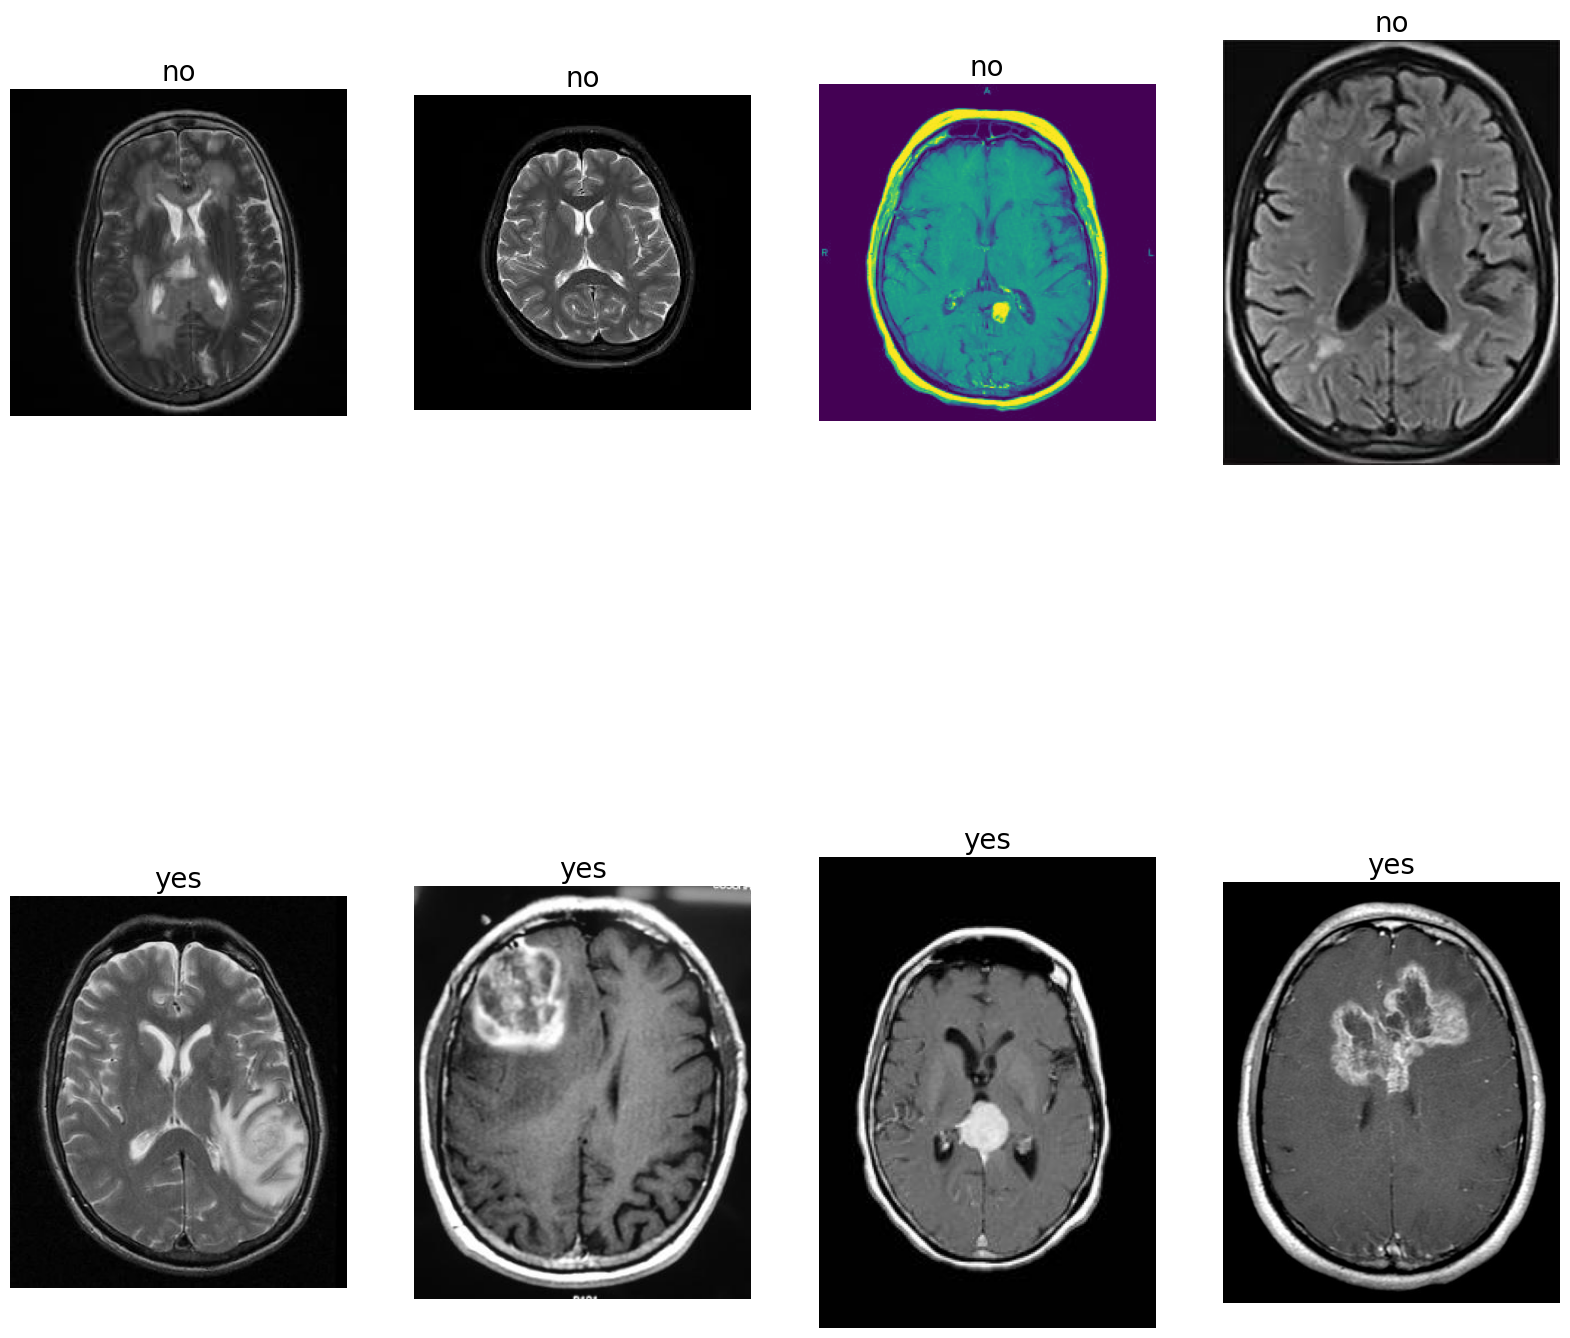

In [8]:
#import libraries to view the content of my dataframe
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Function to plot the data frame so i can see the contents
def plot_image(directory,class_names, num_imgs=4):
  class_dir=[os.path.join(directory, class_name) for class_name in class_names]
  fig, axes= plt.subplots(len(class_dir), num_imgs, figsize=(20,20))
  for i, dir in enumerate(class_dir):
    files= os.listdir(dir)[:num_imgs]
    for j, file in enumerate(files[:num_imgs]):
      img_path= os.path.join(dir, file)
      img= mpimg.imread(img_path)
      axes[i,j].imshow(img)
      axes[i,j].axis("off")
      axes[i,j].set_title(class_names[i],fontsize=20)
  plt.show()
plot_image(file_path, class_names,num_imgs=4)

In [9]:
#Import pytorch library
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from PIL import Image
import os

In [10]:
#Define the target image size for resizing

Target_Size= (255,255)

#Define normalization values for pre-trained models in PyTorch

normalize= transforms.Normalize(mean=[0.5], std=[0.5]) #for graysacle images

#Define the transformation pipeline with data augumentation
transform= transforms.Compose([
    transforms.Resize(Target_Size),
    transforms.Grayscale(num_output_channels=1), #Convert to Grayscale
    transforms.RandomRotation(degrees=20),       #Random Rotation to 20 degrees
    transforms.RandomHorizontalFlip(p=0.5),      #Horizontal flip with 50% probability
    transforms.RandomVerticalFlip(p=0.5),        #Vertical flip with 50% probability
    transforms.ToTensor(),
    normalize
])
#Function to load and preprocess an image

def load_and_preprocess_image(image_path):
  #open the image
  img= Image.open(image_path).convert('L') #Convert to grayscale
  #Apply Transformation
  img_tensor = transform(img)
  return img_tensor




In [11]:
#List to store preprocessed images and their corresponding labels
import numpy as np
preprocessed_images=[]
labels=[]

#iterate through the DataFrame and preprocess each image with augumentation
for idx, row in data.iterrows():
  image_path= row['file']
  label=row['class']
  #load and preprocess the image
  augumented_image = load_and_preprocess_image(image_path)
  for img_tensor in augumented_image:
    preprocessed_images.append(img_tensor)
    labels.append(label)

In [12]:
print(f'preprocessed_images:{preprocessed_images}')
print(f'labels:{labels}')

preprocessed_images:[tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]]), tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]]), tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]]), tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., 

In [13]:
#Convert the list tensors numbers
X= torch.stack (preprocessed_images)
class_to_idx={'no':0, 'yes':1}

#convert labels to numerical values using the mapping
numerical_labels=[class_to_idx[label] for label in labels]

#now create the tensor for tensor from the numerical labels
y= torch.tensor(numerical_labels)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state= 42)

In [16]:
import torch.nn as nn
class SimpleCNN(nn.Module):
  def __init__ (self, num_classes=20):
    super(SimpleCNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, kernel_size= 3, padding=1)
    self.relu1=nn.Conv2d(1, 32, kernel_size=3, padding=1)
    self.relu1=nn.ReLU()
    self.pool1=nn.MaxPool2d(kernel_size=3, stride=2)
    self.conv2=nn.Conv2d(32, 64, kernel_size=3, padding=1)
    self.relu2=nn.ReLU()
    self.pool2=nn.MaxPool2d(kernel_size=2, stride=2)
    self.fcl=nn.Linear(64 * 63 * 63, 128) #Adjust the size based on image dimensions and pooling
    self.relu3= nn.ReLU()
    self.fc2 = nn.Linear(128, num_classes)
  def forward(self,x):
    #Reshape the input tensor to (batch_size, channels, height, width)
    x= x.view(x.size(0), 1, x.size(1), x.size(2))
    x=self.pool1(self.relu1(self.conv1(x)))
    x=self.pool2(self.relu2(self.conv2(x)))
    x=x.view(-1, 64 * 63* 63) #Adjust input size based on image dimensions and pooling
    x= self.relu3 (self.fcl(x))
    x= self.fc2(x)
    return x

    #Example Usage
model= SimpleCNN()
model

SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fcl): Linear(in_features=254016, out_features=128, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=128, out_features=20, bias=True)
)

In [17]:
#prompt: train the model

#Hyperparameters
learning_rate= 0.001
batch_size = 4
num_epochs= 10
#Loss Function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer= optim.Adam(model.parameters(), lr= learning_rate)

#Create date loaders
train_dataset= torch.utils.data.TensorDataset(X_train, y_train)
train_loader= DataLoader(train_dataset, batch_size= batch_size, shuffle= True)

test_dataset= torch.utils.data.TensorDataset(X_test, y_test)
test_loader= DataLoader(test_dataset, batch_size= batch_size, shuffle= False)

#Training loop
for epoch in range(num_epochs):
    model.train() #Set the model to training mode
    for i, (images, labels) in enumerate(train_loader):
      #Zero the gradients from the previous iteration
      optimizer.zero_grad()
      #Forward pass: Get predictions from the model
      outputs= model(images)
      #Calculate the loss
      loss= criterion(outputs, labels)
      #Backpropagation: Calculate gradients
      loss.backward()
      #Update the model's weights
      optimizer.step()
      #print progress every 10 steps
      if (i+1) % 10 == 0:
        print(f'Epoch[{epoch +1}/{num_epochs}], Step[{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}]')
#Evaluation
model.eval() #set the model to evaluate mode
correct = 0
total= 0
with torch.no_grad(): #Disable gradient calculation during evaluation
 for images, labels in test_loader:
  #Get prediction
  output = model(images)
  #Get the class labels
  _,predicted = torch.max(output.data,1) # Use output instead of outputs
  #update the total number of samples
  total += labels.size(0)
  #Update the number of correctly clasified samples
  correct += (predicted == labels).sum().item()


print (f'Accuracy of the model on the test images: {100 * correct / total}%')

Epoch[1/10], Step[10/51], Loss: 1.0814]
Epoch[1/10], Step[20/51], Loss: 1.3627]
Epoch[1/10], Step[30/51], Loss: 1.6218]
Epoch[1/10], Step[40/51], Loss: 0.7092]
Epoch[1/10], Step[50/51], Loss: 0.9317]
Epoch[2/10], Step[10/51], Loss: 0.2078]
Epoch[2/10], Step[20/51], Loss: 0.2577]
Epoch[2/10], Step[30/51], Loss: 0.0836]
Epoch[2/10], Step[40/51], Loss: 0.3737]
Epoch[2/10], Step[50/51], Loss: 0.1318]
Epoch[3/10], Step[10/51], Loss: 0.1390]
Epoch[3/10], Step[20/51], Loss: 0.0975]
Epoch[3/10], Step[30/51], Loss: 0.4016]
Epoch[3/10], Step[40/51], Loss: 0.0402]
Epoch[3/10], Step[50/51], Loss: 0.4734]
Epoch[4/10], Step[10/51], Loss: 0.0230]
Epoch[4/10], Step[20/51], Loss: 0.0234]
Epoch[4/10], Step[30/51], Loss: 0.1319]
Epoch[4/10], Step[40/51], Loss: 0.0401]
Epoch[4/10], Step[50/51], Loss: 0.0170]
Epoch[5/10], Step[10/51], Loss: 0.0139]
Epoch[5/10], Step[20/51], Loss: 0.0150]
Epoch[5/10], Step[30/51], Loss: 0.3210]
Epoch[5/10], Step[40/51], Loss: 0.0014]
Epoch[5/10], Step[50/51], Loss: 0.0147]
